## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/train_with_econ_wout_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 30 columns):
EVENT_ID              4675 non-null int64
INJURIES_DIRECT       4675 non-null int64
DEATHS_DIRECT         4675 non-null int64
DAMAGE_PROPERTY       4675 non-null float64
DAMAGE_CROPS          4675 non-null float64
DURATION_SECONDS      4675 non-null float64
BEGIN_LAT             4675 non-null float64
BEGIN_LON             4675 non-null float64
TOR_LENGTH            4675 non-null float64
TOR_WIDTH             4675 non-null float64
BEGIN_DATE_TIME       4675 non-null float64
YEAR                  4675 non-null int64
CZ_NAME               4675 non-null object
STATE                 4675 non-null object
OPEN_WATER_PROP       4675 non-null float64
DEV_OPEN_PROP         4675 non-null float64
DEV_LOW_PROP          4675 non-null float64
DEV_MED_PROP          4675 non-null float64
DEV_HIGH_PROP         4675 non-null float64
DECID_FOREST_PROP     4675 non-null float64
EVERGR_FOREST_PROP    4

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:,
                               [3]].astype(float)


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 1 columns):
DAMAGE_PROPERTY    4675 non-null float64
dtypes: float64(1)
memory usage: 36.6 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:,
                               6:]


# Get rid of non-location and non-landcover variables
tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "BEGIN_DATE_TIME",
                                          "YEAR",
                                          "CZ_NAME",
                                          "STATE"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 18 columns):
BEGIN_LAT             4675 non-null float64
BEGIN_LON             4675 non-null float64
OPEN_WATER_PROP       4675 non-null float64
DEV_OPEN_PROP         4675 non-null float64
DEV_LOW_PROP          4675 non-null float64
DEV_MED_PROP          4675 non-null float64
DEV_HIGH_PROP         4675 non-null float64
DECID_FOREST_PROP     4675 non-null float64
EVERGR_FOREST_PROP    4675 non-null float64
MIXED_FOREST_PROP     4675 non-null float64
SHRUB_SCRUB_PROP      4675 non-null float64
GRASS_LAND_PROP       4675 non-null float64
PASTURE_HAY_PROP      4675 non-null float64
CULT_CROPS_PROP       4675 non-null float64
WOOD_WETLAND_PROP     4675 non-null float64
HERB_WETLAND_PROP     4675 non-null float64
BARREN_LAND_PROP      4675 non-null float64
INCOME                4675 non-null float64
dtypes: float64(18)
memory usage: 657.5 KB


In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.5951
 1.2772
 0.6926
   ⋮    
 0.7159
 0.8757
 0.4558
[torch.DoubleTensor of size 4675x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 3.8572e-01 -7.9828e-01 -7.0826e-02  ...  -2.1285e-01 -6.9525e-01  1.2000e+00
 1.8039e-01  9.5833e-01 -1.2739e+00  ...  -9.0635e-01  2.2024e+00 -5.1531e-01
-1.0135e+00  7.6543e-01  1.0548e+00  ...   1.6766e+00 -6.9525e-01  4.9763e-01
                ...                   ⋱                   ...                
 6.1517e-02  4.1479e-01 -1.4388e-02  ...  -9.0635e-01 -6.9525e-01 -8.3143e-02
 3.3896e-02  5.4983e-01  1.5888e+00  ...   3.6783e-01  1.1558e+00 -1.2968e+00
-7.4953e-01  9.0271e-01 -1.5467e-01  ...  -9.0635e-01  6.8160e-01 -1.6639e+00
[torch.DoubleTensor of size 4675x18]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 3.8572e-01 -7.9828e-01 -7.0826e-02  ...  -2.1285e-01 -6.9525e-01  1.2000e+00
 1.8039e-01  9.5833e-01 -1.2739e+00  ...  -9.0635e-01  2.2024e+00 -5.1531e-01
-1.0135e+00  7.6543e-01  1.0548e+00  ...   1.6766e+00 -6.9525e-01  4.9763e-01
                ...                   ⋱                   ...                
 6.1517e-02  4.1479e-01 -1.4388e-02  ...  -9.0635e-01 -6.9525e-01 -8.3143e-02
 3.3896e-02  5.4983e-01  1.5888e+00  ...   3.6783e-01  1.1558e+00 -1.2968e+00
-7.4953e-01  9.0271e-01 -1.5467e-01  ...  -9.0635e-01  6.8160e-01 -1.6639e+00
[torch.FloatTensor of size 4675x18]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 9e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

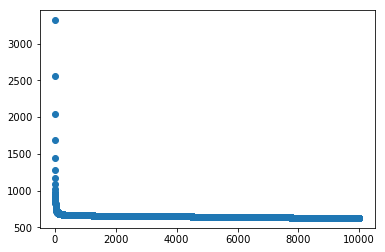

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4675)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(4675)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

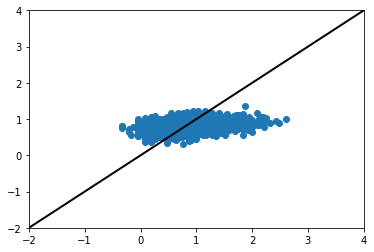

In [16]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/cv_with_econ_wout_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [3]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:,
                                 6:]

# Get rid of non-location and non-landcover variables
valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "BEGIN_DATE_TIME",
                                          "YEAR",
                                          "CZ_NAME",
                                          "STATE"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 18 columns):
BEGIN_LAT             1604 non-null float64
BEGIN_LON             1604 non-null float64
OPEN_WATER_PROP       1604 non-null float64
DEV_OPEN_PROP         1604 non-null float64
DEV_LOW_PROP          1604 non-null float64
DEV_MED_PROP          1604 non-null float64
DEV_HIGH_PROP         1604 non-null float64
DECID_FOREST_PROP     1604 non-null float64
EVERGR_FOREST_PROP    1604 non-null float64
MIXED_FOREST_PROP     1604 non-null float64
SHRUB_SCRUB_PROP      1604 non-null float64
GRASS_LAND_PROP       1604 non-null float64
PASTURE_HAY_PROP      1604 non-null float64
CULT_CROPS_PROP       1604 non-null float64
WOOD_WETLAND_PROP     1604 non-null float64
HERB_WETLAND_PROP     1604 non-null float64
BARREN_LAND_PROP      1604 non-null float64
INCOME                1604 non-null float64
dtypes: float64(18)
memory usage: 225.6 KB


In [20]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight

In [21]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1279.1512
[torch.FloatTensor of size 1]

In [22]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 18 columns):
BEGIN_LAT             1604 non-null float64
BEGIN_LON             1604 non-null float64
OPEN_WATER_PROP       1604 non-null float64
DEV_OPEN_PROP         1604 non-null float64
DEV_LOW_PROP          1604 non-null float64
DEV_MED_PROP          1604 non-null float64
DEV_HIGH_PROP         1604 non-null float64
DECID_FOREST_PROP     1604 non-null float64
EVERGR_FOREST_PROP    1604 non-null float64
MIXED_FOREST_PROP     1604 non-null float64
SHRUB_SCRUB_PROP      1604 non-null float64
GRASS_LAND_PROP       1604 non-null float64
PASTURE_HAY_PROP      1604 non-null float64
CULT_CROPS_PROP       1604 non-null float64
WOOD_WETLAND_PROP     1604 non-null float64
HERB_WETLAND_PROP     1604 non-null float64
BARREN_LAND_PROP      1604 non-null float64
INCOME                1604 non-null float64
dtypes: float64(18)
memory usage: 225.6 KB


In [23]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1604)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [24]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(1604)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

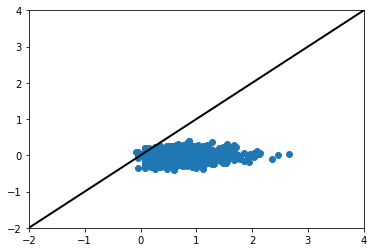

In [25]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 2: Two-Hidden-Layer Neural Network

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 1))

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

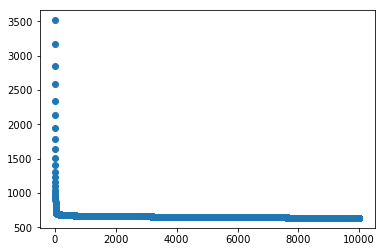

In [29]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4675)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

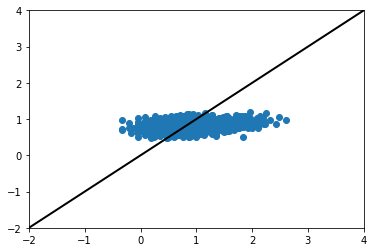

In [31]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [32]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight

In [33]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1153.2968
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1604)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

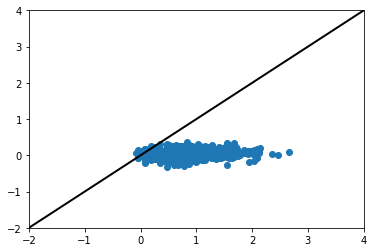

In [35]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 3: Three-Hidden-Layer Neural Network

In [36]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [37]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [38]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

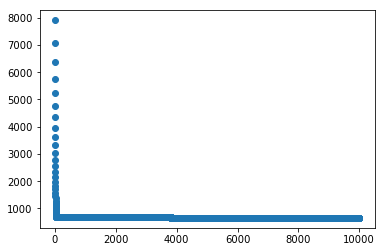

In [39]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [40]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4675)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

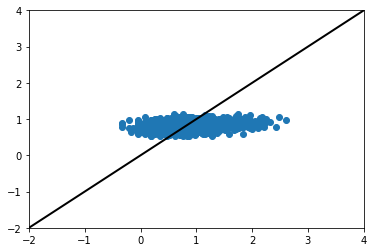

In [41]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [42]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight

In [43]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1683.8701
[torch.FloatTensor of size 1]

In [44]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1604)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

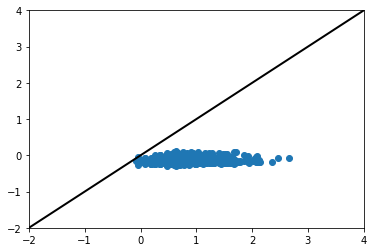

In [45]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 4: Four-Hidden Layer Neural Network

In [46]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [47]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [48]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

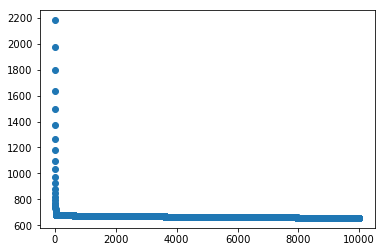

In [49]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [50]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4675)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

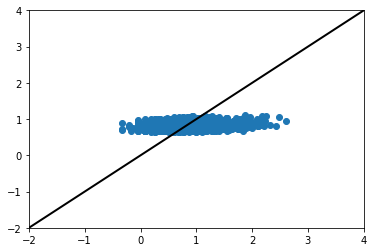

In [51]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [52]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight

In [53]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 651.1784
[torch.FloatTensor of size 1]

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1604)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

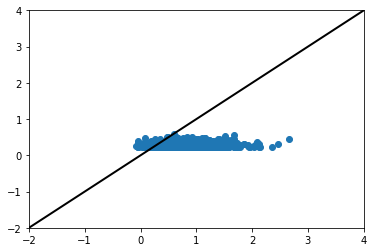

In [55]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 5: Five-Hidden-Layer Neural Network

In [56]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [57]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [58]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

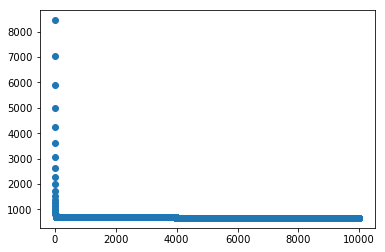

In [59]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [60]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4675)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

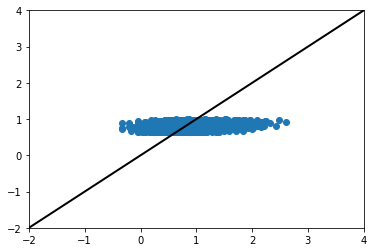

In [61]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [62]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 2),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(2, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight

In [63]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3514.3977
[torch.FloatTensor of size 1]

In [64]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1604)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

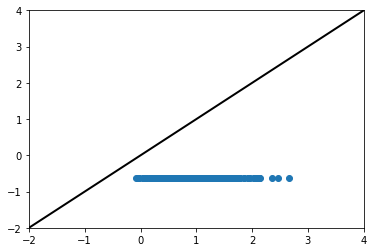

In [65]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 6: Linear Regression

In [66]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [67]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(18, 1))

In [68]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-6


# Train the neural network
for t in range(10000):
    
    # Get the current prediction
    y_pred = model(features_Variable)
    
    # Compute and append loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

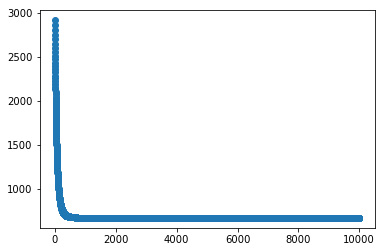

In [69]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [70]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4675)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

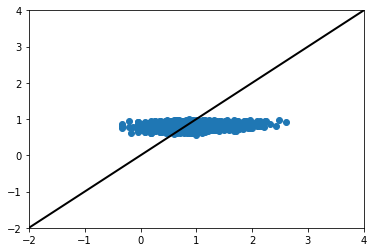

In [71]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [72]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight

In [73]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 726.8968
[torch.FloatTensor of size 1]

In [74]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1604)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

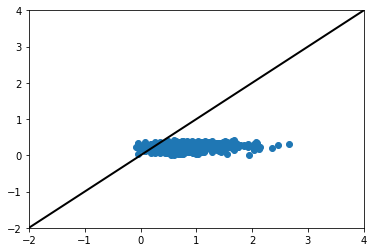

In [75]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)